In [1]:
import graphlab

In [2]:
def polynomial_sframe(feature, degree):
    poly_sframe = graphlab.SFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_sframe[name] = feature.apply(lambda x: x**power)
    return poly_sframe

In [3]:
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

In [4]:
sales = graphlab.SFrame('kc_house_data.csv')

This non-commercial license of GraphLab Create for academic use is assigned to HaQuocHuyPtit@gmail.com and will expire on February 06, 2021.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\admin\AppData\Local\Temp\graphlab_server_1584949415.log.0


Finished parsing file C:\Users\admin\Desktop\Lab-4-ridge regression\kc_house_data.csv

Parsing completed. Parsed 100 lines in 0.139682 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,str,float,long,float,long,long,float,long,long,long,long,long,long,long,long,long,float,float,long,long]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file C:\Users\admin\Desktop\Lab-4-ridge regression\kc_house_data.csv

Parsing completed. Parsed 21613 lines in 0.127872 secs.

In [5]:
sales = sales.sort(['sqft_living','price'])

In [6]:
l2_small_penalty = 1e-5
poly15_data = polynomial_sframe(sales['sqft_living'], 15)
my_features15 = poly15_data.column_names() # get the name of the features
poly15_data['price'] = sales['price']

In [9]:
model15 = graphlab.linear_regression.create(poly15_data, target = 'price', features = my_features15, l2_penalty=l2_small_penalty, 
                                            validation_set = None)
model15.get("coefficients").print_rows(num_rows = 16)


Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-------------+-------+--------------------+-------------------+
|     name    | index |       value        |       stderr      |
+-------------+-------+--------------------+-------------------+
| (intercept) |  None |   146954.842191    |   157627.904383   |
|   power_1   |  None |   193.651207648    |   492.213425556   |
|   power_2   |  None | -0.00910224468769  |   0.578907638806  |
|   power_3   |  None | -1.9053488718e-05  | 0.000317779020041 |
|   power_4   |  None | 8.73398864333e-09  |  7.3581921806e-08 |
|   power_5   |  None | -2.73057060139e-14 | 4.86139758659e-15 |
|   power_6   |  None | -1.89436696305e-16 | 5.24325660544e-16 |
|   power_7   |  None | -7.63300302279e-20 | 2.56330909097e-18 |
|   power_8   |  None | 9.71787959431e-24  | 1.22948719031e-21 |
|   power_9   |  None | 1.69053526608e-28  | 2.62212251289e-25 |
|   power_10  |  None | -3.5651499494e-32  | 2.54740696276e-29 |
|   power_11  |  None | -2.49443569015e-36 |        nan        |
|   power_12  |  None | 1

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.035655     | 2667753.942844     | 245406.229117 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [11]:
(semi_split1, semi_split2) = sales.random_split(.5,seed=0)
(set_1, set_2) = semi_split1.random_split(0.5, seed=0)
(set_3, set_4) = semi_split2.random_split(0.5, seed=0)

+-------------+-------+--------------------+-------------------+
|     name    | index |       value        |       stderr      |
+-------------+-------+--------------------+-------------------+
| (intercept) |  None |   27906.0355803    |   325232.510561   |
|   power_1   |  None |   529.272594561    |   985.453883839   |
|   power_2   |  None |  -0.342257824205   |   1.10832722902   |
|   power_3   |  None | 0.000121000914719  | 0.000570262375967 |
|   power_4   |  None | -1.3200209022e-08  | 1.20711944256e-07 |
|   power_5   |  None | -9.47920632227e-15 | 9.85031720796e-15 |
|   power_6   |  None |  3.1256865848e-16  | 1.05932949332e-15 |
|   power_7   |  None | 6.46586171957e-21  | 2.52746847247e-18 |
|   power_8   |  None | 6.62231536656e-25  | 8.22853187866e-22 |
|   power_9   |  None | -3.8142984422e-29  |        nan        |
|   power_10  |  None | -6.87320153782e-33 |        nan        |
|   power_11  |  None | -2.89015703492e-37 |        nan        |
|   power_12  |  None | 1

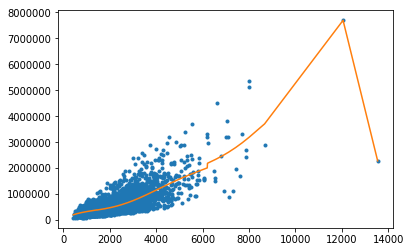

In [12]:
poly1_data = polynomial_sframe(set_1['sqft_living'], 15) # use equivalent of `polynomial_sframe`
my_features = poly1_data.column_names() 
poly1_data['price'] = set_1['price']
model1 = graphlab.linear_regression.create(poly1_data, target = 'price', features = my_features, verbose = False, 
                                           validation_set = None, l2_penalty=l2_small_penalty)
model1.get("coefficients").print_rows(num_rows=16)
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
        poly1_data['power_1'], model1.predict(poly1_data),'-')

+-------------+-------+--------------------+-------------------+
|     name    | index |       value        |       stderr      |
+-------------+-------+--------------------+-------------------+
| (intercept) |  None |   66372.2344249    |   516777.361141   |
|   power_1   |  None |   468.531102167    |   1972.18229283   |
|   power_2   |  None |   -0.35681334084   |   2.91783717475   |
|   power_3   |  None | 0.000177977131205  |  0.00205126446145 |
|   power_4   |  None | -3.45596538957e-08 | 6.12285241915e-07 |
|   power_5   |  None | -3.27569382894e-14 | 1.66146710413e-14 |
|   power_6   |  None | 2.08128762713e-16  | 1.05729098931e-15 |
|   power_7   |  None | 4.37715917436e-19  |  4.513687294e-17  |
|   power_8   |  None | -7.03106165049e-23 | 2.63030572241e-20 |
|   power_9   |  None | -4.22264653652e-27 | 4.87430879122e-24 |
|   power_10  |  None | 5.70778292524e-31  |        nan        |
|   power_11  |  None | 9.68992043528e-35  |        nan        |
|   power_12  |  None | 2

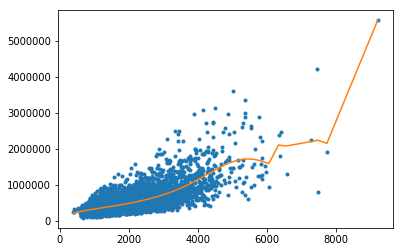

In [13]:
poly2_data = polynomial_sframe(set_2['sqft_living'], 15) # use equivalent of `polynomial_sframe`
my_features = poly2_data.column_names() 
poly2_data['price'] = set_2['price']
model2 = graphlab.linear_regression.create(poly2_data, target = 'price', features = my_features, verbose = False, 
                                           validation_set = None, l2_penalty=l2_small_penalty)
model2.get("coefficients").print_rows(num_rows=16)
plt.plot(poly2_data['power_1'],poly2_data['price'],'.',
        poly2_data['power_1'], model2.predict(poly2_data),'-')


+-------------+-------+--------------------+-------------------+
|     name    | index |       value        |       stderr      |
+-------------+-------+--------------------+-------------------+
| (intercept) |  None |   318778.380988    |   432800.975535   |
|   power_1   |  None |   -270.383391286   |   1438.71661191   |
|   power_2   |  None |   0.429861190159   |   1.81178941751   |
|   power_3   |  None | -0.000196044486653 |  0.00106426023916 |
|   power_4   |  None | 3.56899230247e-08  | 2.60222482853e-07 |
|   power_5   |  None | -5.38054032674e-14 | 1.00000725514e-14 |
|   power_6   |  None | -4.72676046966e-16 | 1.07830579194e-15 |
|   power_7   |  None | -1.52345335801e-19 | 5.32971112042e-18 |
|   power_8   |  None | 9.95365104226e-24  |        nan        |
|   power_9   |  None | 1.62765178588e-27  |        nan        |
|   power_10  |  None | 3.04560404494e-33  |        nan        |
|   power_11  |  None | -1.59070058381e-35 |        nan        |
|   power_12  |  None | -

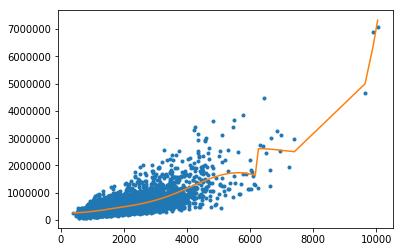

In [14]:
poly3_data = polynomial_sframe(set_3['sqft_living'], 15) # use equivalent of `polynomial_sframe`
my_features = poly3_data.column_names() 
poly3_data['price'] = set_3['price']
model3 = graphlab.linear_regression.create(poly3_data, target = 'price', features = my_features, verbose = False, 
                                           validation_set = None, l2_penalty=l2_small_penalty)
model3.get("coefficients").print_rows(num_rows=16)
plt.plot(poly3_data['power_1'],poly3_data['price'],'.',
        poly3_data['power_1'], model3.predict(poly3_data),'-')

+-------------+-------+--------------------+-------------------+
|     name    | index |       value        |       stderr      |
+-------------+-------+--------------------+-------------------+
| (intercept) |  None |   -205450.598395   |   750592.771445   |
|   power_1   |  None |   1366.85452794    |   3415.39131514   |
|   power_2   |  None |   -1.37772875665   |   5.92598382293   |
|   power_3   |  None |  0.00066800847141  |  0.00479692760765 |
|   power_4   |  None | -1.2348526611e-07  |  1.6245327948e-06 |
|   power_5   |  None | -6.53793118368e-15 | 1.90844081183e-14 |
|   power_6   |  None | -6.23353962181e-16 | 1.22361122831e-15 |
|   power_7   |  None | 8.84426378897e-19  | 1.69158636496e-16 |
|   power_8   |  None | -7.26066654992e-23 | 1.16410924448e-19 |
|   power_9   |  None | -1.56773611843e-26 | 3.65775497897e-23 |
|   power_10  |  None | -7.58341113055e-32 | 6.45475936491e-27 |
|   power_11  |  None | 2.42930432531e-34  | 8.95460822744e-31 |
|   power_12  |  None |  

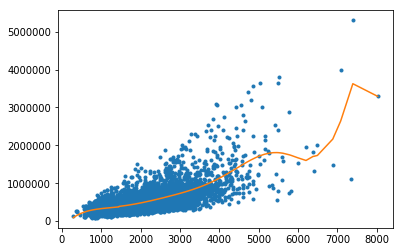

In [15]:
poly4_data = polynomial_sframe(set_4['sqft_living'], 15) # use equivalent of `polynomial_sframe`
my_features = poly4_data.column_names() 
poly4_data['price'] = set_4['price']
model4 = graphlab.linear_regression.create(poly4_data, target = 'price', features = my_features, verbose = False, 
                                           validation_set = None, l2_penalty=l2_small_penalty)
model4.get("coefficients").print_rows(num_rows=16)
plt.plot(poly4_data['power_1'],poly4_data['price'],'.',
        poly4_data['power_1'], model4.predict(poly4_data),'-')
